# Project
### Gagana Uday Kumar (WOV796)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [2]:
fr = pd.read_csv("Fundraising.csv")
fr

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,Yes,No,No,No,Yes,1,1,No,7,698,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,Donor
1,No,No,No,Yes,No,2,5,Yes,8,828,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,Donor
2,No,No,No,Yes,Yes,1,3,No,4,1471,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,No Donor
3,No,Yes,No,No,Yes,1,4,No,8,547,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,No Donor
4,No,Yes,No,No,Yes,1,4,Yes,8,482,...,275,28,38,73.0,10.0,10.0,31,3,7.300000,Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,No,No,Yes,No,Yes,1,5,Yes,4,882,...,374,21,46,111.0,22.0,9.0,36,5,9.250000,No Donor
2996,No,No,No,Yes,Yes,1,5,No,7,2085,...,494,9,55,93.0,15.0,15.0,29,3,9.300000,No Donor
2997,No,No,No,Yes,Yes,3,7,Yes,2,897,...,334,16,57,162.0,20.0,20.0,29,15,14.727273,No Donor
2998,No,No,No,Yes,No,1,2,Yes,5,429,...,360,15,54,80.0,10.0,10.0,32,1,8.000000,No Donor


In [3]:
frf = pd.read_csv("future_fundraising.csv")
frf

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift
0,No,Yes,No,No,Yes,1,5,Yes,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143
1,Yes,No,No,No,Yes,1,1,No,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923
2,No,No,No,Yes,Yes,1,4,Yes,1,835,310,364,22,70,126.0,6.0,6.0,34,8,4.344828
3,No,No,Yes,No,Yes,1,4,No,8,1019,389,473,15,21,26.0,16.0,16.0,37,5,13.000000
4,No,Yes,No,No,Yes,1,2,Yes,7,992,524,563,6,63,100.0,20.0,3.0,21,6,7.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,No,Yes,No,No,Yes,1,6,Yes,8,1126,609,657,3,18,25.0,25.0,25.0,37,5,25.000000
116,No,Yes,No,No,Yes,1,4,No,2,604,259,295,23,56,80.0,5.0,5.0,33,2,2.962963
117,No,No,No,Yes,No,1,2,No,8,412,240,299,25,61,238.0,25.0,25.0,19,0,21.636364
118,No,No,Yes,No,Yes,1,5,No,8,1207,601,594,0,46,105.0,15.0,10.0,29,7,10.500000


In [4]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   object 
 1   zipconvert3          3000 non-null   object 
 2   zipconvert4          3000 non-null   object 
 3   zipconvert5          3000 non-null   object 
 4   homeowner            3000 non-null   object 
 5   num_child            3000 non-null   int64  
 6   income               3000 non-null   int64  
 7   female               3000 non-null   object 
 8   wealth               3000 non-null   int64  
 9   home_value           3000 non-null   int64  
 10  med_fam_inc          3000 non-null   int64  
 11  avg_fam_inc          3000 non-null   int64  
 12  pct_lt15k            3000 non-null   int64  
 13  num_prom             3000 non-null   int64  
 14  lifetime_gifts       3000 non-null   float64
 15  largest_gift         3000 non-null   f

In [5]:
frf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          120 non-null    object 
 1   zipconvert3          120 non-null    object 
 2   zipconvert4          120 non-null    object 
 3   zipconvert5          120 non-null    object 
 4   homeowner            120 non-null    object 
 5   num_child            120 non-null    int64  
 6   income               120 non-null    int64  
 7   female               120 non-null    object 
 8   wealth               120 non-null    int64  
 9   home_value           120 non-null    int64  
 10  med_fam_inc          120 non-null    int64  
 11  avg_fam_inc          120 non-null    int64  
 12  pct_lt15k            120 non-null    int64  
 13  num_prom             120 non-null    int64  
 14  lifetime_gifts       120 non-null    float64
 15  largest_gift         120 non-null    flo

In [6]:
fr['zipconvert2'] = fr['zipconvert2'].map({'Yes': 1, 'No': 0})
fr['zipconvert3'] = fr['zipconvert3'].map({'Yes': 1, 'No': 0})
fr['zipconvert4'] = fr['zipconvert4'].map({'Yes': 1, 'No': 0})
fr['zipconvert5'] = fr['zipconvert5'].map({'Yes': 1, 'No': 0})
fr['homeowner'] = fr['homeowner'].map({'Yes': 1, 'No': 0})
fr['female'] = fr['female'].map({'Yes': 1, 'No': 0})
fr['target'] = fr['target'].map({'Donor': 1, 'No Donor': 0})
#carseats = pd.get_dummies(carseats, prefix=['ShelveLoc'])
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   int64  
 1   zipconvert3          3000 non-null   int64  
 2   zipconvert4          3000 non-null   int64  
 3   zipconvert5          3000 non-null   int64  
 4   homeowner            3000 non-null   int64  
 5   num_child            3000 non-null   int64  
 6   income               3000 non-null   int64  
 7   female               3000 non-null   int64  
 8   wealth               3000 non-null   int64  
 9   home_value           3000 non-null   int64  
 10  med_fam_inc          3000 non-null   int64  
 11  avg_fam_inc          3000 non-null   int64  
 12  pct_lt15k            3000 non-null   int64  
 13  num_prom             3000 non-null   int64  
 14  lifetime_gifts       3000 non-null   float64
 15  largest_gift         3000 non-null   f

In [7]:
frf['zipconvert2'] = frf['zipconvert2'].map({'Yes': 1, 'No': 0})
frf['zipconvert3'] = frf['zipconvert3'].map({'Yes': 1, 'No': 0})
frf['zipconvert4'] = frf['zipconvert4'].map({'Yes': 1, 'No': 0})
frf['zipconvert5'] = frf['zipconvert5'].map({'Yes': 1, 'No': 0})
frf['homeowner'] = frf['homeowner'].map({'Yes': 1, 'No': 0})
frf['female'] = frf['female'].map({'Yes': 1, 'No': 0})

#carseats = pd.get_dummies(carseats, prefix=['ShelveLoc'])
frf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          120 non-null    int64  
 1   zipconvert3          120 non-null    int64  
 2   zipconvert4          120 non-null    int64  
 3   zipconvert5          120 non-null    int64  
 4   homeowner            120 non-null    int64  
 5   num_child            120 non-null    int64  
 6   income               120 non-null    int64  
 7   female               120 non-null    int64  
 8   wealth               120 non-null    int64  
 9   home_value           120 non-null    int64  
 10  med_fam_inc          120 non-null    int64  
 11  avg_fam_inc          120 non-null    int64  
 12  pct_lt15k            120 non-null    int64  
 13  num_prom             120 non-null    int64  
 14  lifetime_gifts       120 non-null    float64
 15  largest_gift         120 non-null    flo

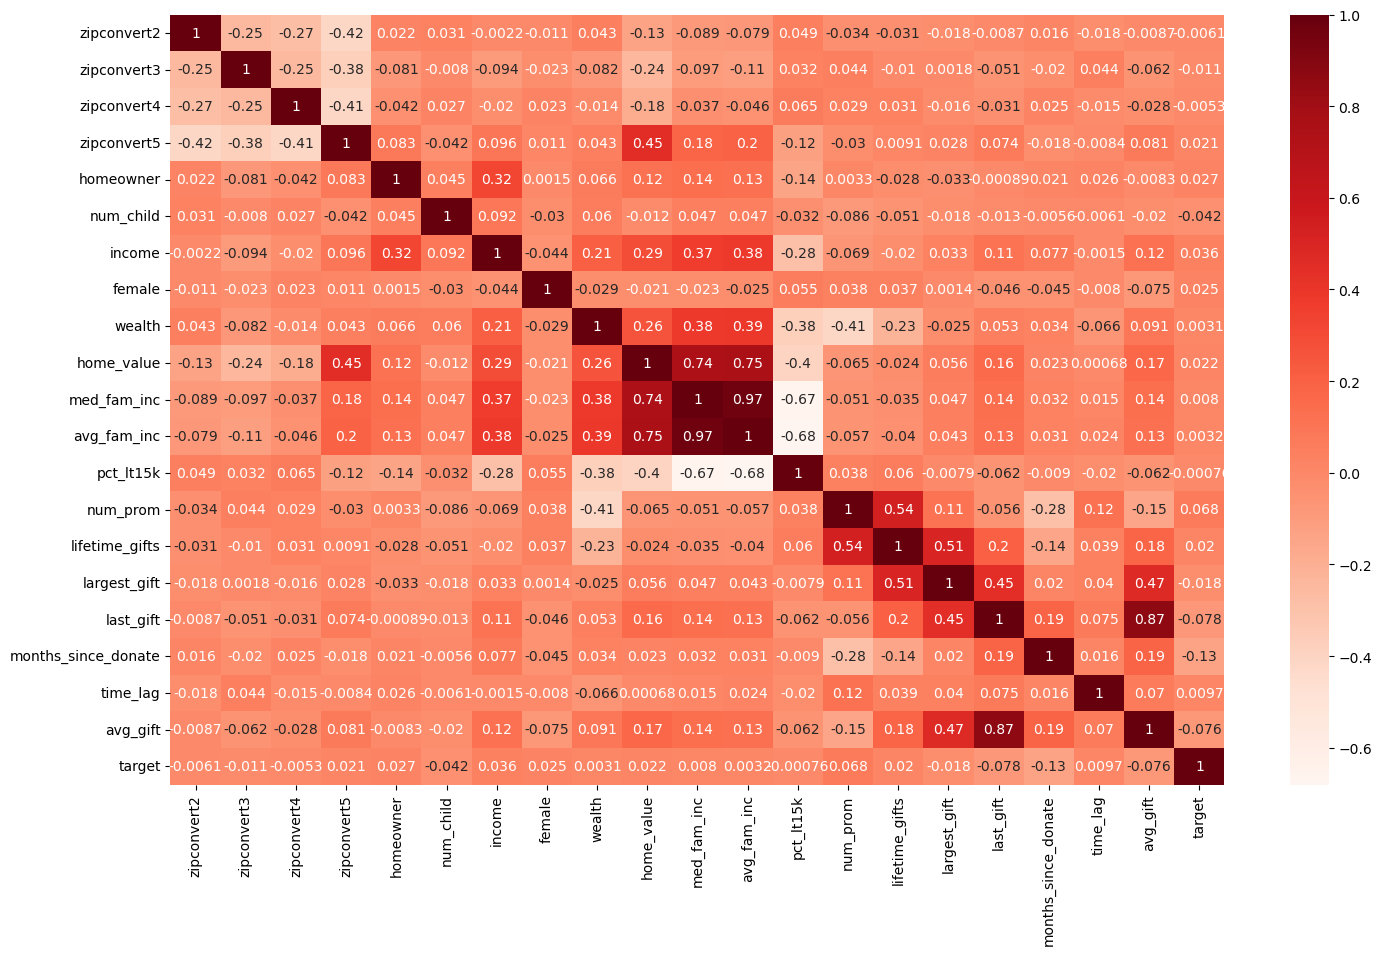

In [8]:
corr_matrix = fr.corr()

# create a heatmap to visualize the correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

avg_fam_inc and  med_fam_inc have the highest correlation and hence we would take out one of them.

avg_gift and last_gift is correlated and would remove one of those variables too 

In [9]:
#fr.drop(columns=['med_fam_inc'], inplace=True) 
#fr.drop(columns=['last_gift'], inplace=True) 


In [10]:
#frf.drop(columns=['med_fam_inc'], inplace=True) 
#frf.drop(columns=['last_gift'], inplace=True) 
#frf.info()

In [11]:
fr.drop(columns=['avg_fam_inc'], inplace=True) 
frf.drop(columns=['avg_fam_inc'], inplace=True) 
fr.drop(columns=['med_fam_inc'], inplace=True) 
frf.drop(columns=['med_fam_inc'], inplace=True) 
fr.drop(columns=['avg_gift'], inplace=True) 
frf.drop(columns=['avg_gift'], inplace=True) 

In [12]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   int64  
 1   zipconvert3          3000 non-null   int64  
 2   zipconvert4          3000 non-null   int64  
 3   zipconvert5          3000 non-null   int64  
 4   homeowner            3000 non-null   int64  
 5   num_child            3000 non-null   int64  
 6   income               3000 non-null   int64  
 7   female               3000 non-null   int64  
 8   wealth               3000 non-null   int64  
 9   home_value           3000 non-null   int64  
 10  pct_lt15k            3000 non-null   int64  
 11  num_prom             3000 non-null   int64  
 12  lifetime_gifts       3000 non-null   float64
 13  largest_gift         3000 non-null   float64
 14  last_gift            3000 non-null   float64
 15  months_since_donate  3000 non-null   i

In [13]:
print(fr.columns)

Index(['zipconvert2', 'zipconvert3', 'zipconvert4', 'zipconvert5', 'homeowner',
       'num_child', 'income', 'female', 'wealth', 'home_value', 'pct_lt15k',
       'num_prom', 'lifetime_gifts', 'largest_gift', 'last_gift',
       'months_since_donate', 'time_lag', 'target'],
      dtype='object')


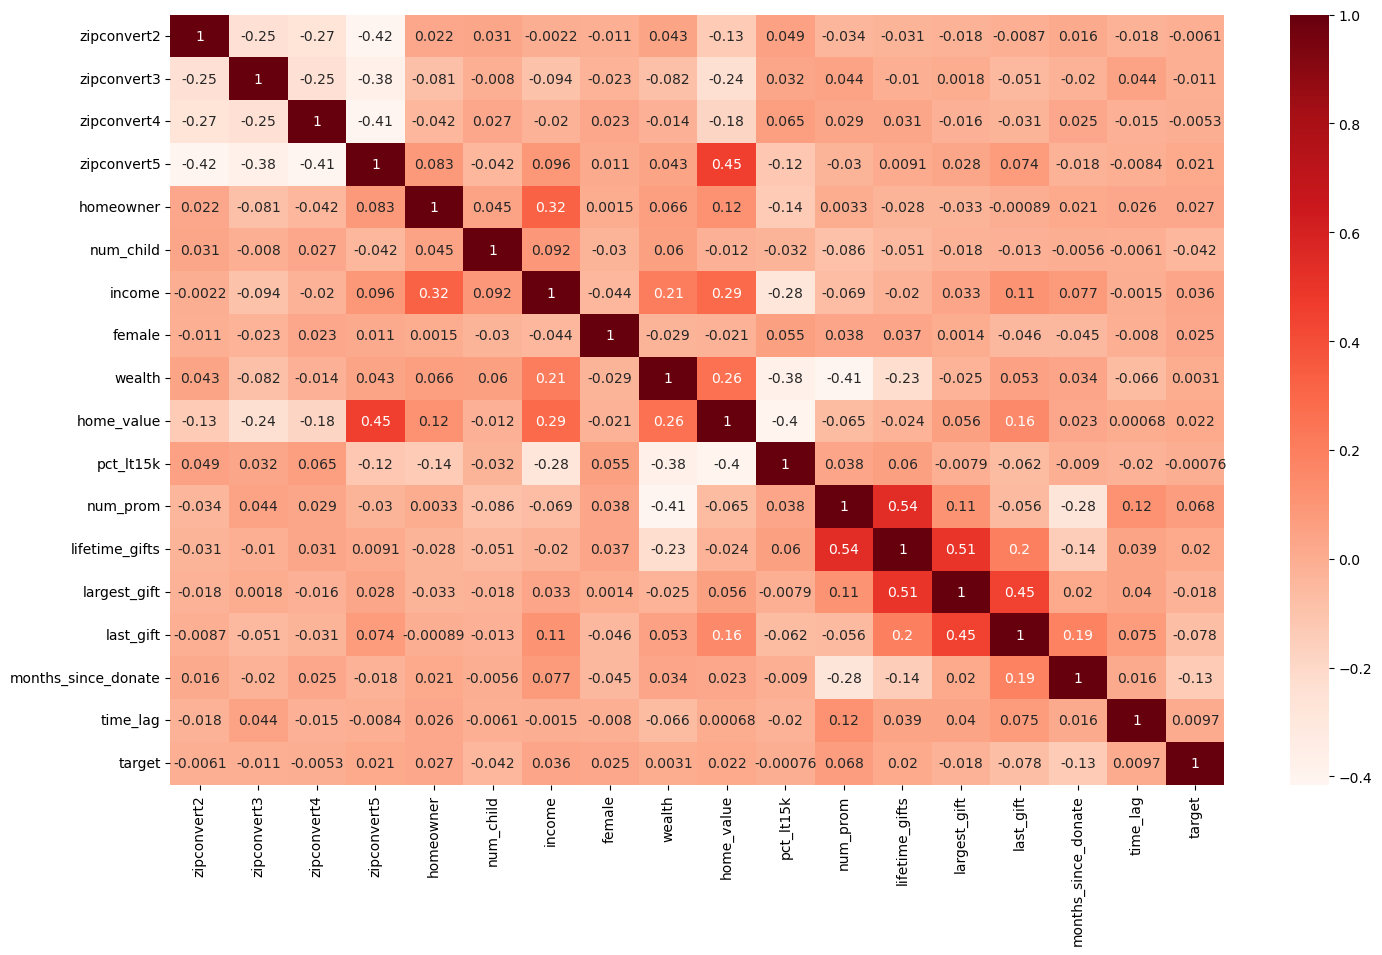

In [14]:
corr_matrix = fr.corr()

# create a heatmap to visualize the correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
fr.describe()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.216000,0.183667,0.214333,0.384667,0.770667,1.069333,3.899000,0.610333,6.395667,1143.26800,14.710333,49.13900,110.740517,16.645863,13.483000,31.132667,6.876000,0.499667
std,0.411583,0.387277,0.410427,0.486598,0.420474,0.345301,1.639419,0.487756,2.546752,952.14572,12.109637,22.77964,149.380144,22.517663,10.475278,4.095281,5.601763,0.500083
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,11.00000,15.000000,5.000000,0.000000,17.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,5.000000,554.75000,5.000000,29.00000,45.000000,10.000000,7.000000,29.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,8.000000,816.50000,12.000000,48.00000,81.000000,15.000000,10.000000,31.000000,5.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,8.000000,1341.25000,21.000000,65.00000,135.000000,20.000000,16.000000,34.000000,9.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,9.000000,5945.00000,90.000000,157.00000,5674.900000,1000.000000,219.000000,37.000000,77.000000,1.000000


In [16]:
fr.corr()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,target
zipconvert2,1.000000,-0.248972,-0.274154,-0.415007,0.022366,0.030670,-0.002249,-0.010790,0.042502,-0.133943,0.049487,-0.033718,-0.031291,-0.018436,-0.008738,0.015832,-0.018461,-0.006130
zipconvert3,-0.248972,1.000000,-0.247746,-0.375032,-0.081165,-0.007986,-0.094191,-0.023466,-0.082495,-0.237678,0.031967,0.044049,-0.010365,0.001802,-0.050683,-0.019784,0.043855,-0.010875
zipconvert4,-0.274154,-0.247746,1.000000,-0.412965,-0.041617,0.026866,-0.020346,0.022579,-0.014168,-0.183110,0.064759,0.029267,0.031164,-0.015777,-0.030912,0.025333,-0.014832,-0.005338
zipconvert5,-0.415007,-0.375032,-0.412965,1.000000,0.082547,-0.041696,0.095951,0.010783,0.043428,0.454646,-0.120856,-0.030275,0.009137,0.028064,0.074452,-0.017920,-0.008429,0.021081
homeowner,0.022366,-0.081165,-0.041617,0.082547,1.000000,0.045246,0.320470,0.001478,0.065770,0.118728,-0.137541,0.003260,-0.028164,-0.033339,-0.000885,0.021354,0.026287,0.026595
num_child,0.030670,-0.007986,0.026866,-0.041696,0.045246,1.000000,0.091893,-0.029597,0.060176,-0.011964,-0.031718,-0.086433,-0.050955,-0.017554,-0.012949,-0.005564,-0.006069,-0.042348
income,-0.002249,-0.094191,-0.020346,0.095951,0.320470,0.091893,1.000000,-0.043813,0.208993,0.291973,-0.283191,-0.069009,-0.019565,0.033181,0.109593,0.077239,-0.001546,0.035953
female,-0.010790,-0.023466,0.022579,0.010783,0.001478,-0.029597,-0.043813,1.000000,-0.029384,-0.020976,0.055176,0.038218,0.037074,0.001382,-0.046360,-0.045057,-0.008049,0.024757
wealth,0.042502,-0.082495,-0.014168,0.043428,0.065770,0.060176,0.208993,-0.029384,1.000000,0.261161,-0.375146,-0.412118,-0.225473,-0.025277,0.052591,0.033714,-0.066421,0.003114
home_value,-0.133943,-0.237678,-0.183110,0.454646,0.118728,-0.011964,0.291973,-0.020976,0.261161,1.000000,-0.399086,-0.064514,-0.024074,0.056494,0.158858,0.023429,0.000679,0.021569


In [17]:
X = fr.drop(columns=["target"])
y = fr["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Set random seed for reproducibility
random_state_seed = 12345

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model 1: Logistic Regression with regularization and increased max_iter
logreg_model = LogisticRegression(class_weight='balanced',random_state=random_state_seed, max_iter=1000, penalty='l2', solver='lbfgs')
logreg_model.fit(X_train_scaled, y_train)

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=random_state_seed)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_logreg = logreg_model.predict(X_val_scaled)
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate the models
accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

roc_auc_logreg = roc_auc_score(y_val, logreg_model.predict_proba(X_val_scaled)[:, 1])
roc_auc_rf = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])

conf_matrix_logreg = confusion_matrix(y_val, y_val_pred_logreg)
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)

# Print results
print("Logistic Regression - Accuracy:", accuracy_logreg)
print("Random Forest - Accuracy:", accuracy_rf)

print("Logistic Regression - ROC AUC:", roc_auc_logreg)
print("Random Forest - ROC AUC:", roc_auc_rf)

print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_logreg)

print("Random Forest - Confusion Matrix:")
print(conf_matrix_rf)


Logistic Regression - Accuracy: 0.5566666666666666
Random Forest - Accuracy: 0.49833333333333335
Logistic Regression - ROC AUC: 0.5666618517983533
Random Forest - ROC AUC: 0.5153668374093044
Logistic Regression - Confusion Matrix:
[[168 133]
 [133 166]]
Random Forest - Confusion Matrix:
[[164 137]
 [164 135]]


In [19]:
import pandas as pd
from pycaret.classification import setup, compare_models, predict_model

# Set random seed for reproducibility
seed = 12345

# Combine the training features and labels into one DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Initialize PyCaret with the training data and set the random seed
exp = setup(data=train_data, target='target', session_id=seed)

# Compare models and get the best model
best_model = compare_models()

# Evaluate the best model on the validation data
predictions = predict_model(best_model, data=X_val)

# You can print or analyze the predictions as needed
print(predictions)


,Description,Value
0,Session id,12345
1,Target,target
2,Target type,Binary
3,Original data shape,"(2400, 18)"
4,Transformed data shape,"(2400, 18)"
5,Transformed train set shape,"(1680, 18)"
6,Transformed test set shape,"(720, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5560,0.0000,0.5655,0.5551,0.5594,0.1119,0.1122,0.0470
ada,Ada Boost Classifier,0.5548,0.5698,0.5345,0.5565,0.5445,0.1095,0.1098,0.2720
lda,Linear Discriminant Analysis,0.5530,0.5753,0.5643,0.5521,0.5572,0.1060,0.1063,0.0570
lr,Logistic Regression,0.5506,0.5665,0.5286,0.5543,0.5400,0.1012,0.1017,1.3050
knn,K Neighbors Classifier,0.5411,0.5388,0.5524,0.5402,0.5456,0.0821,0.0824,1.2350
rf,Random Forest Classifier,0.5387,0.5557,0.5107,0.5420,0.5250,0.0774,0.0778,0.6320
gbc,Gradient Boosting Classifier,0.5387,0.5636,0.5286,0.5391,0.5333,0.0774,0.0775,0.5340
et,Extra Trees Classifier,0.5339,0.5369,0.5179,0.5374,0.5262,0.0679,0.0685,0.5540
nb,Naive Bayes,0.5315,0.5623,0.3298,0.5560,0.4098,0.0631,0.0703,0.0600
lightgbm,Light Gradient Boosting Machine,0.5196,0.5280,0.5155,0.5206,0.5168,0.0393,0.0397,1.5110


      zipconvert2  zipconvert3  zipconvert4  zipconvert5  homeowner  \
1957            0            0            1            0          1   
2087            0            1            0            0          1   
1394            1            0            0            0          1   
1520            1            0            0            0          0   
1098            1            0            0            0          1   
...           ...          ...          ...          ...        ...   
2495            0            0            0            1          0   
94              0            0            0            1          1   
2742            0            0            0            1          1   
1999            0            1            0            0          1   
1178            0            0            1            0          1   

      num_child  income  female  wealth  home_value  pct_lt15k  num_prom  \
1957          1       4       1       4         597         22        5

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Set random seed for reproducibility
random_state = 12345

# Model 3: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=random_state)
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred_gb = gb_model.predict(X_val_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
roc_auc_gb = roc_auc_score(y_val, gb_model.predict_proba(X_val_scaled)[:, 1])
conf_matrix_gb = confusion_matrix(y_val, y_val_pred_gb)

# Print evaluation results
print("Gradient Boosting - Accuracy:", accuracy_gb)
print("Gradient Boosting - ROC AUC:", roc_auc_gb)
print("Gradient Boosting - Confusion Matrix:")
print(conf_matrix_gb)


Gradient Boosting - Accuracy: 0.545
Gradient Boosting - ROC AUC: 0.5636840409337882
Gradient Boosting - Confusion Matrix:
[[175 126]
 [147 152]]


In [21]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
random_state = 12345

# Define parameter grid for GradientBoostingClassifier
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Initialize GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=random_state)

# Define a KFold cross-validator with a specific random state
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_gb_classifier = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred_gb = best_gb_classifier.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)

print("Gradient Boosting Classifier - Accuracy:", accuracy_gb)
print("Best Parameters:", best_params)




Gradient Boosting Classifier - Accuracy: 0.5516666666666666
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
random_state = 12345

# Initialize the StandardScaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf','poly']  # Linear and RBF kernels
}

# Initialize the SVC model
svc_model = SVC(random_state=random_state, probability=True)  # Set probability=True for ROC AUC score

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy', random_state=random_state)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred_svc = best_svc_model.predict(X_val_scaled)

# Evaluate the model
accuracy_svc = accuracy_score(y_val, y_val_pred_svc)
roc_auc_svc = roc_auc_score(y_val, best_svc_model.predict_proba(X_val_scaled)[:, 1])
conf_matrix_svc = confusion_matrix(y_val, y_val_pred_svc)

# Print evaluation metrics
print("Support Vector Machine - Accuracy:", accuracy_svc)
print("Support Vector Machine - ROC AUC:", roc_auc_svc)
print("Support Vector Machine - Confusion Matrix:")
print(conf_matrix_svc)
print("Best Parameters:", best_params)



In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Set the random state for reproducibility
random_state_seed = 12345

# Assuming `X_train`, `y_train`, `X_val`, `y_val`, and `frf` are already loaded as pandas DataFrames

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler with the training data (`X_train`) and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the Logistic Regression model with the specified parameters
logreg_model = LogisticRegression(random_state=random_state_seed, max_iter=1000, penalty='l2', solver='lbfgs')
logreg_model.fit(X_train_scaled, y_train)

# Evaluate the Logistic Regression model on the validation set
y_val_pred_logreg = logreg_model.predict(X_val_scaled)
accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
roc_auc_logreg = roc_auc_score(y_val, logreg_model.predict_proba(X_val_scaled)[:, 1])
conf_matrix_logreg = confusion_matrix(y_val, y_val_pred_logreg)

# Print the evaluation results of the Logistic Regression model
print("Logistic Regression - Accuracy:", accuracy_logreg)
print("Logistic Regression - ROC AUC:", roc_auc_logreg)
print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_logreg)

# Transform the future fundraising test data (`frf`) using the fitted StandardScaler
X_test_scaled = scaler.transform(frf)

# Use the trained Logistic Regression model to make predictions on the scaled test data
y_test_pred = logreg_model.predict(X_test_scaled)

# Create a DataFrame for the submission file
submission_df = pd.DataFrame({'Id': frf.index, 'Prediction': y_test_pred})

# Save the predictions to a CSV file for submission
submission_df.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")



Logistic Regression - Accuracy: 0.565
Logistic Regression - ROC AUC: 0.5656173957488417
Logistic Regression - Confusion Matrix:
[[168 133]
 [128 171]]
Predictions saved to submission.csv


In [74]:
frf

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,months_since_donate,time_lag,avg_gift
0,0,1,0,0,1,1,5,1,9,1399,703,1,74,102.0,6.0,29,3,4.857143
1,1,0,0,0,1,1,1,0,7,1355,497,9,77,249.0,15.0,35,3,9.576923
2,0,0,0,1,1,1,4,1,1,835,364,22,70,126.0,6.0,34,8,4.344828
3,0,0,1,0,1,1,4,0,8,1019,473,15,21,26.0,16.0,37,5,13.000000
4,0,1,0,0,1,1,2,1,7,992,563,6,63,100.0,20.0,21,6,7.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,1,1,6,1,8,1126,657,3,18,25.0,25.0,37,5,25.000000
116,0,1,0,0,1,1,4,0,2,604,295,23,56,80.0,5.0,33,2,2.962963
117,0,0,0,1,0,1,2,0,8,412,299,25,61,238.0,25.0,19,0,21.636364
118,0,0,1,0,1,1,5,0,8,1207,594,0,46,105.0,15.0,29,7,10.500000


In [141]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming `fr` (full training data) and `frf` (test data) are already loaded as pandas DataFrames

# Set the random state for reproducibility
random_state_seed = 12345

# Separate the features and target from the full training data
X_full_train = fr.drop(columns=['target'])  # Replace 'target_column' with the name of the target column in the `fr` dataset
y_full_train = fr['target']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler with the full training data (`X_full_train`) and transform the full training data
X_full_train_scaled = scaler.fit_transform(X_full_train)

# Transform the future fundraising test data (`frf`) using the fitted StandardScaler
X_test_scaled = scaler.transform(frf)

# Initialize and train the Logistic Regression model with the specified parameters
logreg_model = LogisticRegression(class_weight='balanced',random_state=random_state_seed, max_iter=1000, penalty='l2', solver='lbfgs')
logreg_model.fit(X_full_train_scaled, y_full_train)

# Use the trained Logistic Regression model to make predictions on the scaled test data
y_test_pred = logreg_model.predict(X_test_scaled)

# Create a DataFrame for the submission file
submission_df = pd.DataFrame({'Id': frf.index, 'Prediction': y_test_pred})

# Save the predictions to a CSV file for submission
submission_df.to_csv('submission1.csv', index=False)

print("Predictions saved to submission.csv")


Predictions saved to submission.csv


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = nb_model.predict(X_val_scaled)

# Calculate the accuracy of the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracy
print("Naive Bayes Model - Accuracy:", accuracy)


Naive Bayes Model - Accuracy: 0.515
